# Project - Airbnb Paris

## Background

When traveling to Europe and booking an Airbnb rental property for a vacation, I try to spend less on lodging to be able to afford good dining and tours.  For Paris specifically, I find that the options close to the centre, that is close to the top attractions i.e. Eiffel tower, Champs Elysees are pricier, and most of the properties are unavailable as well, so I end up staying further from the centre, and when I do, I am always worried that I might have booked a property that is way too far out from the centre of the city, and or far from a metro station -- since actual location is not provided until after you have made the reservation, or unless you contact host and ask.  Distance to the station is relative depending on how far one is willing to walk, but for me, more than half a mile walk to a station is considered far, since I feel I have to save all my energy for the leisurely walking one does around in Paris.

## Questions for Exploration / Goals

### A.  Explore the following questions:

#### 1) How does location influence property rental price?  

* What features drive the price of an airbnb rental property? i.e. price vs location, price vs distance from a top attraction, etc.
  
  
* are the differences in price in the different arrondissements statistically significant?

#### 2) Can we model the airbnb rental property prices based on the features, i.e. location, distance to attraction, number of bedrooms, etc.?
   
#### 3) What features drive the availability of an Airbnb property?

  
#### 4) Can we model and predict that the property will be available for more than 5 days within the next 30 days based on the features available?

### B.  Recommend Airbnb properties based on a specified set of features


## Datasets

The Airbnb dataset was downloaded from the OpenDataSoft website below.  The data was filtered to only extract and download data pertaining to Paris, France Airbnb rental properties.

[Airbnb Paris Dataset](https://public.opendatasoft.com/explore/dataset/airbnb-listings/table/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&refine.city=Paris&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZX0%3D)

Paris RER/metro dataset was downloaded from the website below and will be used for further exploration:


[Accessibilite des gares et stations de Metro](https://data.ratp.fr/explore/?sort=modified)


### Limitations
* the Airbnb data from OpenDataSoft was last updated in 2017, availability information will be based on what has been captured from the last update.
* Historical data for the property prices and availabity are not available, so we are unable to check for variability of price and availability on different seasons/time.
* For computing distances Haversine formula was used, which would be a good estimate for computing the distance between two points, but this distance could be different from the actual walking distance.

## Cleaning the Data

The geojson file format was read and used for this analysis. The original download file has eighty-six (86) columns, columns which are not needed for analysis, i.e. calendar_last_scraped, calendar_updated, listing_url, etc. were dropped to minimize columns and focus on cleaning and analysis of data which will be useful this EDA.

The 'city' column was dropped from the file as well, since all the records downloaded are those pertaining to Airbnb rental properties in Paris, France.

Further research on zipcodes was done, and found that zipcodes 75001 - 75020 correspond to Arrondissements 1 through 20 in Paris.  Since analysis will be focused on properties within the centre of Paris, the records with zipcodes outside of this range were deleted.

*More information on Paris Arrondissements in wikipedia: https://en.wikipedia.org/wiki/Arrondissements_of_Paris

### Missing Values:
Missing values in beds and bedrooms were imputed using the following rules:
* If 'beds' has a missing value, and 'bedrooms' has a valid value, 'beds' is set with the value of 'bedrooms'.
* If both 'bedrooms' and 'beds' are missing, both fields are set to 1, which is the average number of beds and bedrooms,
and it would be safe to assume that if a property is being rented out in Airbnb, that there is at least one bed, and we will count that as one bedroom, regardless if the property is a studio apartment, where there is no pyhsical division between the rooms.

There were several records as well with missing 'scores' value, a new column 'rating_ind' was created to flag rated = 1, versus unrated = 0 records, so further analysis can be done between these two populations.  The record was flagged as rated, if all the score values have been populated, and set to unrated, if at least one of the score values has not been populated.

### Data Transformation and Feature Engineering:

The following fields were added to the dataset as well:

<br>1) arrondissement - this was derived from the last two digits of the zipcode

2) arrond_name - arrondissement name was populated and compared with the values populated in the neighbourhood_cleansed field.  There were some differences found, since no information is available on how the neighbourhood_cleansed field was derived, for the sake of consistency with the categorizing by Arrondissement, the arrond_name will be used for analysis instead of the neighbourhood_cleansed field.  


3) A column for each of the Distances between the Airbnb property and each of the [2018 top 10 attractions in Paris](https://www.tripadvisor.com/Attractions-g187147-Activities-Paris_Ile_de_France.html#ATTRACTION_SORT_WRAPPER) were derived as well using the [Haversine forumla](https://community.esri.com/groups/coordinate-reference-systems/blog/2017/10/05/haversine-formula), and these features were used to analyze and determine relationship with the rental property price.

["Musee d’Orsay", "Sainte-Chapelle", "Palais Garnier - Opera", "Notre Dame Cathedral", "Musee de l’Orangerie", "Luxembourg Gardens", "Louvre", "Eiffel", "Pont Alexandre III", "Le Marais"]

4) close_to_attraction - this is an indicator if the property is within 2 miles of one of the top 10 attractions

5) closest_attraction - this is the attraction closest to the Airbnb property

6) attraction_dist - distance between the Airbnb property and the closest attraction.

7) site_count - number of attractions within 1 mile of the Airbnb property




## Exploring the Data

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import time
import itertools

%matplotlib inline
dfParis = pd.read_pickle('../data/airbnb_Paris_updt_0915.p')

In [67]:
#filter to keep rows only for the properties we need:

properties = ['Apartment','Loft','House','Condominium']

df = dfParis[dfParis.property_type.isin(properties)][['accommodates', 'availability_30','bathrooms', 'bedrooms', 'beds',
       'cancellation_policy', 'price', 'property_type', 
       'arrondissement', 'rating_ind', 'close_to_attraction',
       'attraction_dist', 'site_count']].dropna()

#set up data to be used for Price Prediction
X = df.drop(['price'], axis=1)  

dummies = pd.get_dummies(df[['property_type', 'cancellation_policy']])
X2 = pd.concat([X, dummies], axis=1).drop(['property_type','cancellation_policy'], axis=1).astype(float) 
#X2.drop(['property_type','cancellation_policy'], axis=1, inplace=True)
X2_corr_ = dfParis[dfParis.property_type.isin(properties)][['accommodates', 'availability_30','bathrooms', 'bedrooms', 'beds',
       'cancellation_policy', 'price', 'property_type', 
       'arrondissement', 'rating_ind', 'close_to_attraction',
       'attraction_dist', 'site_count']].dropna()


#X2_corr is the dataframe which contains the dependent variable 'price'

X2_corr = pd.concat([X2_corr_, dummies], axis=1).drop(['property_type','cancellation_policy'], axis=1).astype(float)
recent_corr = X2_corr.corr().loc['price'].drop(['price'])


y = pd.DataFrame(df.price)

def conditional_bar(series, bar_colors=None, color_labels=None, figsize=(8,10),
                   xlabel=None, by=None, ylabel=None, title=None):
    fig, ax  = plt.subplots(figsize=figsize)
    if not bar_colors:
        bar_colors = mpl.rcParams['axes.prop_cycle'].by_key()['color'][0]
    plt.barh(range(len(series)),series.values, color=bar_colors)
    plt.xlabel('' if not xlabel else xlabel);
    plt.ylabel('' if not ylabel else ylabel)
    plt.yticks(range(len(series)), series.index.tolist())
    plt.title('' if not title else title);
    plt.ylim([-1,len(series)]);
    if color_labels:
        for col, lab in color_labels.items():
            plt.plot([], linestyle='',marker='s',c=col, label= lab);
        lines, labels = ax.get_legend_handles_labels();
        ax.legend(lines[-len(color_labels.keys()):], labels[-len(color_labels.keys()):], loc='upper right');
    plt.close()
    fig.savefig('../images/X2_corr.png', bbox_inches='tight')
    return fig


In [68]:
###Set-up data to be used for Availability prediction

# add another column avail_ge_5days which will be set to 1 if property is available for 5 or more days in the 
# next 30 days, and 0 otherwise.

def set_avail_ind(row):
    """ this function will add a new column avail_ge_5days which will be set to 1 if property is available for 5 or more days in the 
        next 30 days, and 0 otherwise."""
    if row['availability_30'] >= 5:
        return 1
    else:
        return 0
    
df['avail_ge_5days'] = df.apply(lambda x: set_avail_ind(x), 1)


In [69]:

X_avail = df.drop(['availability_30'], axis=1) #X dataset for the availability prediction
y_avail = pd.DataFrame(df['avail_ge_5days'])

X2_avail = pd.concat([X_avail, dummies], axis=1).drop(['property_type','cancellation_policy','avail_ge_5days'], axis=1).astype(float) 

X2_avail_corr_ = df[['accommodates', 'avail_ge_5days','availability_30','bathrooms', 'bedrooms', 'beds',
       'cancellation_policy', 'price', 'property_type', 
       'arrondissement', 'rating_ind', 'close_to_attraction',
       'attraction_dist', 'site_count']].dropna()


#X2_avail_corr is the dataframe which contains the dependent variable 'avail_ge_5days'

X2_avail_corr = pd.concat([X2_avail_corr_, dummies], axis=1).drop(['property_type','cancellation_policy'], axis=1).astype(float)
recent_avail_corr = X2_avail_corr.corr().loc['availability_30'].drop(['availability_30','avail_ge_5days'])


Plotting the Airbnb rental property prices out shows us that the price of Airbnb rental properties in Paris  has a right-skewed unimodal distribution.  We can see from the graph below it shows that majority of the properties are rented out are below \$200, with the average below \$100 which is at \$93.72, with the median only at $75.  We can see that there are some outliers -- properties over \$400, causing a huge difference between the mean and the median price, and for the distribution to be right skewed.

[graph 1.0]
<img src="../images/airbnb_price_dist.png">

In [3]:
dfParis.price.describe()

count    52295.000000
mean        93.718673
std         71.128178
min          0.000000
25%         55.000000
50%         75.000000
75%        105.000000
max        999.000000
Name: price, dtype: float64

### Question 1)  What features drive the price of an Airbnb rental property

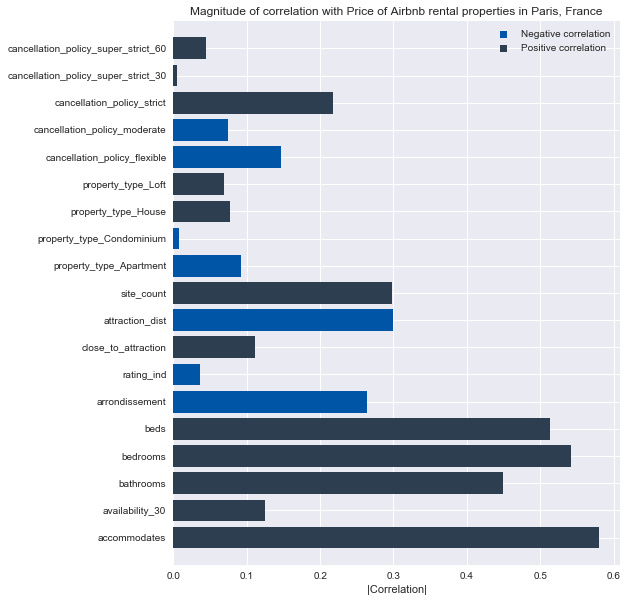

In [5]:
bar_colors = ['#0055A7' if x else '#2C3E4F' for x in list(recent_corr.values < 0)]
color_labels = {'#0055A7':'Negative correlation', '#2C3E4F':'Positive correlation'}

conditional_bar(recent_corr.apply(np.abs), bar_colors, color_labels,
               title='Magnitude of correlation with Price of Airbnb rental properties in Paris, France',
               xlabel='|Correlation|')

#### cancellation_policy
* We can see that the properties with 'strict' cancellation policy have a positive correlation with the price,
  while those with 'moderate' and 'flexible' cancellation policies have a negative correlation with the price. 
  But, is cancellation policy driving the price? Or some other attribute, such as location or number of reviews could 
  be affecting this relationship -- where properties further from top attraction sites, have lower prices, and since 
  they are not in a good location, and hosts will have less strict cancellation policies to attract more Airbnb  
  customers.  Let us explore this further:


<img src="../images/box_CancelPrice.png">



* ##### Cancellation policy vs Number of Sites within 1 mile of Airbnb property

The plot below shows that 50% of properties with a 'strict' cancellation policy have more than one (1) Top attraction within one mile of the property, whereas properties with 'moderate' and 'flexible' cancellation policies would have zero to one Top attraction within one mile of the Airbnb property.


<img src="../images/box_CancelSiteCount.png">


* ##### Cancellation policy  vs. Distance to Closest Attraction

The plot below shows that properties with 'strict' cancellation policies have lower median prices compared to the properties with 'flexible' and 'moderate' cancellation policies.


<img src="../images/box_CancelDistance.png">



* ##### Cancellation policy vs. Number of Reviews

The plot below shows that properties with 'strict' cancellation policies have more number of reviews compared to those of with 'flexible' and 'moderate' cancellation policies,  except for those with a 'super_strict_60' cancellation policy.


<img src="../images/box_CancelNumReviews.png">




#### arrondissement

* Price ~ Arrondissement:  shows a negative correlation.  Lower arrondissements have higher mean price 

Arrondissement values are negatively correlated with the price, that is, the Airbnb properties in the lower Arrondissements on average costs more than the properties in the higher arrondissements, which is what the graph below shows. Although it appears that rental prices in Arr 8 - Champs Elysees costs the most, and Arr 9 - Opera has a lower rental prices compared to arrondissements 1 - 8. This could be because Champs Elysees is generally a pricier neighborhood in Paris, and it is a very famous avenue in Paris.

<img src="../images/df_arrondissements.png">




<img src="../images/line_pricebyArr.png">

#### site_count, close_to_attraction

* site_count and close_to_attraction are positively correlated to the Airbnb rental property price

[graph 1.5]
<img src="../images/box_recmd_price_vs_Fullsitecount.png">



In [10]:
dfParis.groupby('site_count')['price'].agg(['mean', 'median']).reset_index()

,site_count,mean,median
0,0.0,76.159333,65.0
1,1.0,95.897857,80.0
2,2.0,121.728828,90.0
3,3.0,128.648871,100.0
4,4.0,121.395931,99.0
5,5.0,138.018924,106.0
6,6.0,139.726804,110.0
7,7.0,144.026941,110.0
8,8.0,145.265306,111.0


* we can see that the Average cost of properties increase as the site_count increases

#### attraction_dist

* distance of a property to an attraction is negatively correlated to the Airbnb rental property price

#### beds, bedrooms, bathrooms, accommodates

* number of beds, bedrooms, bathrooms, and accommodation are all positively correlated to the Airbnb rental property price

### Are the difference in prices in the different arrondissements statistically significant?


We will use the ANOVA test and the Tukey HSD test to verify if the difference in prices between arrondissements is statistically significant:

In [2]:
###ANOVA test and Tukey HSD test 
import scipy.stats as stats
import math

In [11]:
arr_dict = {}
for x in range(1,21):
    arr_dict[x] = df[df.arrondissement == x]['price']

In [12]:
#perform ANOVA

stats.f_oneway(arr_dict[1], arr_dict[2], arr_dict[3], arr_dict[4], arr_dict[5], 
               arr_dict[6], arr_dict[7], arr_dict[8], arr_dict[9], arr_dict[10],
               arr_dict[11], arr_dict[12], arr_dict[13], arr_dict[14], arr_dict[15], 
               arr_dict[16], arr_dict[17], arr_dict[18], arr_dict[19], arr_dict[20])

F_onewayResult(statistic=363.59705973729274, pvalue=0.0)

In [51]:
#generate list of Arrondissement pairs

arrondissements = [x for x in range(1,21) ]

arr_pairs = []
for comp1 in range(19):
    for comp2 in range(comp1 + 1, 20):
        arr_pairs.append((arrondissements[comp1], arrondissements[comp2]))    

In [52]:
t_value, val1, val2, p_value = [], [], [], []

for comp1, comp2 in arr_pairs:
    t, p = stats.ttest_ind(arr_dict[comp1],
                           arr_dict[comp2])
    val1.append(comp1)
    val2.append(comp2)
    t_value.append(t)
    p_value.append(p)
    
anova_out = pd.DataFrame({"val1": val1, "val2":val2, "t_value":t_value, "p_value":p_value})


In [65]:
print('percentage of pairs to reject:', anova_out[anova_out.p_value < 0.05]['p_value'].count()/len(anova_out)*100)

percentage of pairs to reject: 94.7368421053


### Tukey HSD

In [46]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['price'],
                         groups=df['arrondissement'],
                         alpha=0.05)

Summ = tukey.summary()
print(Summ)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper   reject
-----------------------------------------------
  1      2    -30.1727 -39.475  -20.8705  True 
  1      3    -22.1142 -30.8655 -13.3628  True 
  1      4    -9.7237  -18.6774 -0.7699   True 
  1      5    -31.6398 -40.5549 -22.7247  True 
  1      6     0.3241  -8.7235   9.3717  False 
  1      7    -1.2039  -10.4783  8.0705  False 
  1      8    14.0105   4.3833  23.6378   True 
  1      9    -42.6254 -51.2984 -33.9523  True 
  1      10   -57.3101 -65.4397 -49.1806  True 
  1      11   -60.9721 -68.8187 -53.1255  True 
  1      12   -64.226  -73.0282 -55.4238  True 
  1      13   -69.6719 -78.6732 -60.6706  True 
  1      14   -58.6118 -67.4448 -49.7789  True 
  1      15   -50.6582 -58.7373 -42.5792  True 
  1      16   -29.3364 -38.8384 -19.8344  True 
  1      17   -52.4231  -60.62  -44.2262  True 
  1      18   -66.5878 -74.3352 -58.8404  True 
  1      19   -74.5054 -82.924  -66.0

The Tukey test suggests and confirms that we reject the null hypothesis for majority of the Arrondissement pairs, and that the difference in prices between the Arrondissement pairs are statistically significant.

Plotting the result against Arrondissement 1, we can see that there are two other groups (Arrondissements 6 and 7) whose confidence interval overlaps the confidence interval for Arrondissement 1.


<img src="../images/tukey_ArrPrice.png">

### Question 2)  Can we model the Airbnb rental property price based on the features i.e. location/arrondissement, distance to attraction, number of bedrooms?  (for property type = apartment, house, loft, condominium)

The following features as analyzed will be used for model selection, and further feature selection and refinement:
accommodates, availability_30, bathrooms, bedrooms, beds, arrondissement, rating_ind, attraction_dist,
close_to_attraction, site_count

##### As we will see in the following code below, it is possible to model the Airbnb rental property price using a Multiple Linear Regression Model.  The initial analysis did show correlation of the different features with the price, as the model below will show, Linear regression model may not be the best way to model the price, and or other features not available in the dataset could make the model more accurate.

In [70]:
print('Independent Variables X: ',X2.columns.values)
print('\nDependent Variable y: ',y.columns.values)

Independent Variables X:  ['accommodates' 'availability_30' 'bathrooms' 'bedrooms' 'beds'
 'arrondissement' 'rating_ind' 'close_to_attraction' 'attraction_dist'
 'site_count' 'property_type_Apartment' 'property_type_Condominium'
 'property_type_House' 'property_type_Loft' 'cancellation_policy_flexible'
 'cancellation_policy_moderate' 'cancellation_policy_strict'
 'cancellation_policy_super_strict_30'
 'cancellation_policy_super_strict_60']

Dependent Variable y:  ['price']


#### Model Selection using Validation Set Approach
Find the best number of predictors for the model:

In [71]:
#create Train and Test datasets for getting the best model

np.random.seed(seed=12)
train = np.random.choice([True, False], size=len(y), replace=True)
test = np.invert(train)

def processSubset(feature_set, X_train, y_train, X_test, y_test):
    #fit model on feature_set and calculate RSS
    model = sm.OLS(y_train, X_train[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X_test[list(feature_set)]) - y_test) ** 2).sum()
    return {"model":regr, "RSS":RSS}

def forward(predictors, X_train, y_train, X_test, y_test):
    
    remaining_predictors = [p for p in X_train.columns if p not in predictors]
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors + [p], X_train, y_train, X_test, y_test))
        
    models = pd.DataFrame(results)
    
    best_model = models.loc[models["RSS"].argmin()]
    
    #return the best model
    return best_model

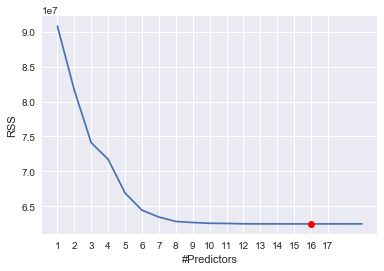

In [72]:
models_train = pd.DataFrame(columns=["RSS", "model"])

predictors = []

for i in range(1, len(X2.columns) + 1):
    models_train.loc[i] = forward(predictors, X2[train], y[train]["price"], X2[test], y[test]["price"])
    predictors = models_train.loc[i]["model"].model.exog_names
    
plt.plot(models_train["RSS"])
plt.xlabel('#Predictors')
plt.ylabel("RSS")
plt.xticks(range(0,18))
plt.plot(models_train["RSS"].argmin(), models_train["RSS"].min(), "or")

based on the output above, the best model is one that contains 16 predictors.

Using the full dataset, perform forward selection to select the best 16-predictor model.

In [73]:
models_full = pd.DataFrame(columns=["RSS", "model"])

predictors = []

for i in range(1,len(X2.columns) + 1):    
    models_full.loc[i] = forward(predictors, X2, y["price"], X2, y["price"])
    predictors = models_full.loc[i]["model"].model.exog_names
    

In [74]:
print(models_train.loc[16, "model"].model.exog_names)
print(models_full.loc[16, "model"].model.exog_names)

['accommodates', 'site_count', 'bedrooms', 'bathrooms', 'attraction_dist', 'availability_30', 'rating_ind', 'cancellation_policy_strict', 'cancellation_policy_super_strict_60', 'property_type_Apartment', 'property_type_Loft', 'close_to_attraction', 'property_type_House', 'beds', 'arrondissement', 'property_type_Condominium']
['accommodates', 'site_count', 'bedrooms', 'availability_30', 'attraction_dist', 'bathrooms', 'rating_ind', 'cancellation_policy_strict', 'cancellation_policy_super_strict_60', 'close_to_attraction', 'property_type_Loft', 'beds', 'arrondissement', 'property_type_House', 'property_type_Apartment', 'property_type_Condominium']


In [75]:
pred_cols = models_full.loc[16, "model"].model.exog_names
orig_cols = list(X2.columns.values)

#print the columns excluded
for pred in orig_cols:
    if (pred in pred_cols) == False:
        print(pred)

cancellation_policy_flexible
cancellation_policy_moderate
cancellation_policy_super_strict_30


In [76]:
model = sm.OLS.from_formula('price ~ ' + '+'.join(pred_cols), X2_corr)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     4068.
Date:                Fri, 14 Sep 2018   Prob (F-statistic):               0.00
Time:                        11:03:24   Log-Likelihood:            -2.7033e+05
No. Observations:               51159   AIC:                         5.407e+05
Df Residuals:                   51143   BIC:                         5.408e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

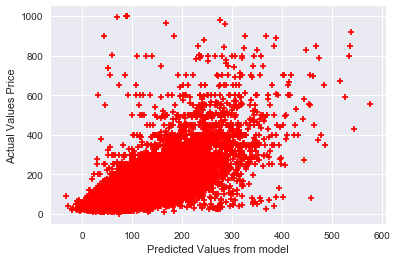

In [77]:
predictions = result.predict(X2)

plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from model")
plt.ylabel("Actual Values Price")
plt.show()

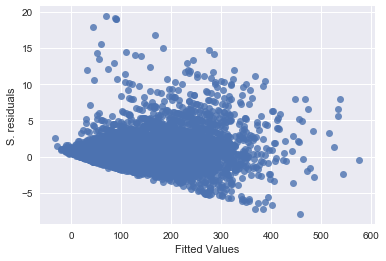

In [78]:
s_residuals = pd.Series(result.resid_pearson, name="S. residuals")
fitted_values = pd.Series(result.fittedvalues, name="Fitted Values")
residuals = pd.Series(result.resid, name="S. Residuals")
sns.regplot(fitted_values, s_residuals,  fit_reg=False)

#### Let us verify if our residuals are heteroscedastic.  We can establish the presence or absence of heteroscedasticity using Breush Pagan test.

http://statisticsbyjim.com/regression/heteroscedasticity-regression/

https://www.r-bloggers.com/how-to-detect-heteroscedasticity-and-rectify-it/

In [82]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breushpagan(result.resid, result.model.exog)
lzip(name, test)

/Users/ayeshamendoza/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')
  


[('Lagrange multiplier statistic', 3498.6749488776713),
 ('p-value', 0.0),
 ('f-value', 250.28886915692192),
 ('f p-value', 0.0)]

The Breush Pagan test shows a p-value less than a significance level of 0.05, therefore we can reject the null hypotheses that the variance of the residuals is constant and infer that heteroscedasticity is present.

Heteroscedastic residuals is the variance of the error is not constant across various levels of our dependent variable.
Heteroscedastic residuals may result to understated and unreliable regression coefficient.  So our model term may show that it is statistically significant, when it actually is not significant.



Further analysis will need to be done to rectify the heteroscedasticity in our model, such as checking for collinearity in our predictors, and or possibly adding more features to make the model more accurate.


### Question 3) What features affect the availability of the Airbnb property in the next 30 days (availability_30) ?

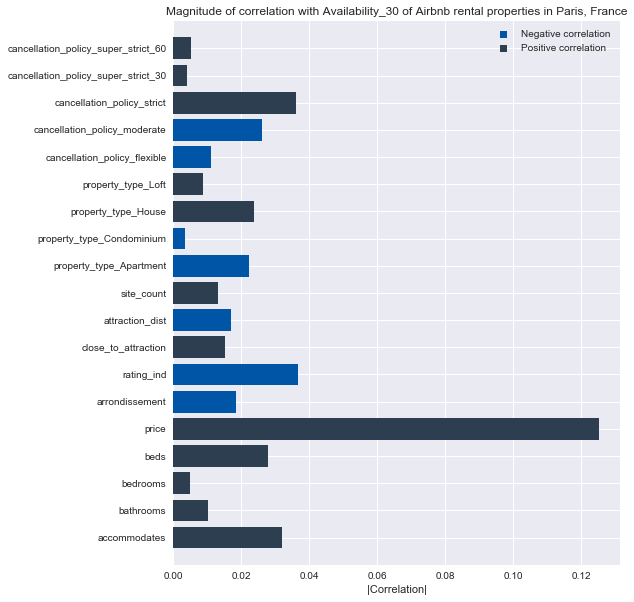

In [58]:
bar_colors = ['#0055A7' if x else '#2C3E4F' for x in list(recent_corr.values < 0)]
color_labels = {'#0055A7':'Negative correlation', '#2C3E4F':'Positive correlation'}

conditional_bar(recent_avail_corr.apply(np.abs), bar_colors, color_labels,
               title='Magnitude of correlation with Availability_30 of Airbnb rental properties in Paris, France',
               xlabel='|Correlation|')

#### price 

The correlation plot above shows a strong positive correlation between the price and the availability of the property.

With regards to the availability, the graphs below show that the price does have some affect on the availability of the Airbnb rental properties in Paris. Properties available for less than 5 days have a lower average price compared to properties which are available for 5 or more days in the next 30 days.


<img src="../images/airbnb_price_byAvail.png">

If we look at availability of Airbnb rental properties by price range, we can see that for properties within \$100/night budget the options for available properties are much less in Arrondissements 1 through 8, increasing your budget will give you better chances of getting a property close to the attractions (in Arrondissements 1 through 8), and if that is not an option, renting outside of arrondissments 1 through 8 will give one a better option of renting out a property within the \$100/night budget.

#### arrondissement

There is a negative correlation on the arrondissements.


<img src="../images/Avail_less100.png">

#### rating_ind

There is a positive correlation between the rating_ind and the availability of the Airbnb property.  As the plot below will show, rated properties have lower availability compare to the unrated properties.


<img src="../images/box_rating_avail.png">

#### attraction_dist

* distance of a property to an attraction is negatively correlated to the Airbnb availability.

#### beds, bedrooms, bathrooms, accommodates

* number of beds, bedrooms, bathrooms, and accommodation are all positively correlated to the Airbnb availability_30.

#### cancellation_policy
* We can see that the properties with 'strict' cancellation policy have a positive correlation with the availability,
  while those with 'moderate' and 'flexible' cancellation policies have a negative correlation with the availability,
  which shows that customers tend to book more Airbnb properties with 'moderate' and 'flexible' cancellation policies, 
  than those with 'strict' cancellation policies.
  

#### site_count, close_to_attraction

* site_count and close_to_attraction are positively correlated to the Airbnb availability



### Question 4)  Can we model and predict if property will be available for 5 or more days in the next 30 days?

For predicting if property will be available for five or more days in the next 30 days, we can use the logistic regression model,
since we have a classification problem, that is, will the property be available for more than 5 days (avail_ge_5days = 1) or Not available (avail_ge_5days = 0).

The column "avail_ge_5days" was added, which was set to 1 if availability_30 > 5 days, and set to 0 otherwise.

In [59]:
#create Train and Test datasets for getting the best model
#X2_avail X dataset for the availability prediction
#y_avail y dataset for the availability prediction, avail_ge_5days

np.random.seed(seed=12)
train = np.random.choice([True, False], size=len(y_avail), replace=True)
test = np.invert(train)

In [60]:
X2_avail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51159 entries, 0 to 52338
Data columns (total 19 columns):
accommodates                           51159 non-null float64
bathrooms                              51159 non-null float64
bedrooms                               51159 non-null float64
beds                                   51159 non-null float64
price                                  51159 non-null float64
arrondissement                         51159 non-null float64
rating_ind                             51159 non-null float64
close_to_attraction                    51159 non-null float64
attraction_dist                        51159 non-null float64
site_count                             51159 non-null float64
property_type_Apartment                51159 non-null float64
property_type_Condominium              51159 non-null float64
property_type_House                    51159 non-null float64
property_type_Loft                     51159 non-null float64
cancellation_policy_fle

##### Let us select the predictors to be used for the model:

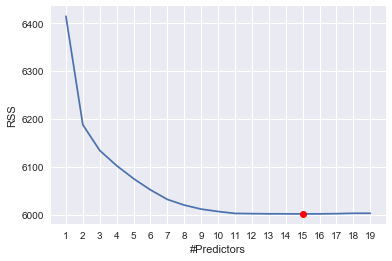

In [94]:
models_train = pd.DataFrame(columns=["RSS", "model"])

predictors = []

for i in range(1, len(X2_avail.columns) + 1):
    models_train.loc[i] = forward(predictors, X2_avail[train], y_avail[train]["avail_ge_5days"], X2_avail[test], y_avail[test]["avail_ge_5days"])
    predictors = models_train.loc[i]["model"].model.exog_names
    
plt.plot(models_train["RSS"])
plt.xlabel('#Predictors')
plt.ylabel("RSS")
plt.xticks(range(0,22))
plt.plot(models_train["RSS"].argmin(), models_train["RSS"].min(), "or")

##### based on the output above, the best model is one that contains 15 predictors.

##### Using the full dataset, perform forward selection to select the best 15-predictor model.

In [95]:
models_full = pd.DataFrame(columns=["RSS", "model"])

predictors = []

for i in range(1,len(X2_avail.columns) + 1):    
    models_full.loc[i] = forward(predictors, X2_avail, y_avail["avail_ge_5days"], X2_avail, y_avail["avail_ge_5days"])
    predictors = models_full.loc[i]["model"].model.exog_names

print(models_train.loc[15, "model"].model.exog_names)
print(models_full.loc[15, "model"].model.exog_names)

log_pred = models_full.loc[15, "model"].model.exog_names

['property_type_Apartment', 'price', 'rating_ind', 'bedrooms', 'property_type_House', 'property_type_Loft', 'cancellation_policy_strict', 'property_type_Condominium', 'accommodates', 'cancellation_policy_flexible', 'attraction_dist', 'beds', 'bathrooms', 'arrondissement', 'close_to_attraction']
['property_type_Apartment', 'price', 'rating_ind', 'bedrooms', 'property_type_House', 'cancellation_policy_strict', 'property_type_Loft', 'accommodates', 'property_type_Condominium', 'attraction_dist', 'bathrooms', 'cancellation_policy_flexible', 'beds', 'cancellation_policy_moderate', 'close_to_attraction']


In [106]:
try:
    X2_avail_corr.drop(['availability_30'],axis=1,inplace=True)
except:
    print('column does not exist')

column does not exist


In [96]:
y_test = y_avail['avail_ge_5days']
type(y_test)

pandas.core.series.Series

In [97]:
log_model = smf.glm(formula='avail_ge_5days ~ ' + '+'.join(log_pred), data=X2_avail_corr,
                    family=sm.families.Binomial())
log_result = log_model.fit()
print(log_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:         avail_ge_5days   No. Observations:                51159
Model:                            GLM   Df Residuals:                    51144
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -33718.
Date:                Thu, 13 Sep 2018   Deviance:                       67435.
Time:                        09:58:33   Pearson chi2:                 5.32e+04
No. Iterations:                     5                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        1.0043      0.874      1.149      0.251      -0.710       2.71

#### Let us run the dataset to predict the availability, and check the accuracy of our Logistic Regression Model

In [98]:
from sklearn.metrics import confusion_matrix, classification_report

predictions = log_result.predict(X2_avail)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]

In [103]:
print(classification_report(y_arr, predictions_nominal, digits=3))

             precision    recall  f1-score   support

          0      0.611     0.874     0.719     29388
          1      0.593     0.247     0.349     21771

avg / total      0.603     0.608     0.562     51159




#### *** With our model, we are able to get an average of 60% precision for predicting whether the Airbnb Paris property will be available or not for more than five days in the next 30 days, with an error rate of (1 - recall), which is 0.392 -- 39%.

## Summary

### A.  Airbnb Paris rental property Price and Availability:
#### 1) How does location influence property rental price?  

* What features drive the price of an airbnb rental property? i.e. price vs location, price vs distance from a top attraction, etc.
  
  
* are the differences in price in the different arrondissements statistically significant?

 Based on our findings, we did confirm that the location is correlated to the Airbnb property price by looking at the following features:  arrondissement, site_count, attraction_dist.  And that the difference in prices in the different arrondissements is statistically significant.

#### 2) Can we model the airbnb rental property prices based on the features, i.e. location, distance to attraction, number of bedrooms, etc.?
   
The analysis did show correlation of price with the other property features.  From our model selection process, were given the following features to use for our model:

['accommodates', 'site_count', 'bedrooms', 'availability_30', 'attraction_dist', 'bathrooms', 'rating_ind', 'cancellation_policy_strict', 'cancellation_policy_super_strict_60', 'close_to_attraction', 'property_type_Loft', 'beds', 'arrondissement', 'property_type_House', 'property_type_Apartment', 'property_type_Condominium']

 A linear regression model may not be the best fit for our model as we can see with the residuals from our linear regression model, heteroscedasticity was present in our model.

Heteroscedastic residuals may result to understated and unreliable regression coefficient.  So our model term may show that it is statistically significant, when it actually is not significant.

Further analysis will need to be done to rectify the heteroscedasticity in our model, such as checking for collinearity in our predictors, and or possibly adding more features to make the model more accurate.

For this project we are limited to using the Linear Regression Model, other types of model have not been explored to see if it would result to better accuracy given the limited features available.


   
#### 3) What features drive the availability of an Airbnb property?

Our analysis showed that the price of the Airbnb property highly correlated to the availability of the Airbnb Paris property.  Other features identified which drives or impacts the availability of the Airbnb property are the rating indicator (rated or unrated), location -- i.e. Arrondissement, site count, attraction distance, close to Attraction, Number of Accommodation, Beds, bedrooms, and bathrooms, and the cancellation policy.

  
#### 4) Can we model and predict that the property will be available for more than 5 days within the next 30 days based on the features available?

Using the Generalized Linear Model, specifically the Logistic Regression model, we were able to generate a model with 60% accuracy for classifying if the Airbnb Paris property will be available for five or more days in the next thirty (30) days, or not.

Our model selection process identified the following features to be used to give the best model:

['property_type_Apartment', 'price', 'rating_ind', 'bedrooms', 'property_type_House', 'cancellation_policy_strict', 'property_type_Loft', 'accommodates', 'property_type_Condominium', 'attraction_dist', 'bathrooms', 'cancellation_policy_flexible', 'beds', 'cancellation_policy_moderate', 'close_to_attraction']


### B. Airbnb Paris Recommendations




Recommendation filter 1:

* properties which are within 1 mile at least one of the top attractions

* Room type == Entire home/apt

* property is within 0.2 miles more than 2 stations


Recommendation filter 2: (if #1 filter results to less than 20 properties, results from #2 will be added to the recommendation list)

* properties which are within 1 mile at least one of the top attractions AND
* Room type == Entire home/apt AND
* property is within 0.2 miles at least 2 stations

Below are Recommended Airbnb properties with the base criteria below, and additional filters applied as defined
in Recommendation filters 1 and 2:  
* Beds: >= 1  
* Accomodates >= 2  
* Available_30 >=  5 days  
* Price Max: $85  
* Rating Ind = 1 (rated properties only)
* Room type = Entire home/Apt
* Review_Scores_Rating = 100.0
   

In [8]:
import pandas as pd
results = pd.read_pickle('airbnb_paris/recommendation_results_0615.p')
results.reset_index(drop = True, inplace = True)
results.style

,id,arrondissement,arrond_name,price,cancellation_policy,closest_attraction,attraction_dist,site_count,station_count,Eiffel Tower,The Louvre,Jardin du Luxembourg,Le Marais,Musee d'Orsay,Sainte-Chapelle,Palais Garnier - Opera,Notre Dame Cathedral,Musee de l'Orangerie,Pont Alexandre III,station1_name,station1_dist,station2_name,station2_dist,station3_name,station3_dist,station4_name,station4_dist,station5_name,station5_dist,latitude,longitude
0,Property12691441,1,Louvre,55,flexible,The Louvre,0.324823,7,3,2.27925,0.324823,1.15417,0.703087,0.819248,0.47351,0.887801,0.687199,0.987702,1.40016,Les Halles,0.100234,Châtelet-Les Halles,0.127479,Louvre-Rivoli,0.177881,Etienne Marcel,0.23604,Châtelet,0.302536,48.86223720346151,2.344298191899912
1,Property1846308,11,Popincourt,80,moderate,The Louvre,0.347938,6,3,2.31314,0.347938,1.08447,0.636549,0.849699,0.385578,0.981818,0.590699,1.04265,1.45202,Châtelet-Les Halles,0.0805858,Les Halles,0.0911123,Louvre-Rivoli,0.19373,Châtelet,0.206811,Etienne Marcel,0.254388,48.86097809420282,2.3452323445275267
2,Property3247039,6,Luxembourg,70,moderate,Sainte-Chapelle,0.376824,6,3,1.94343,0.424355,0.572341,1.04049,0.601516,0.376824,1.23375,0.602936,0.909621,1.24056,Mabillon,0.136513,Odéon,0.180855,Saint-Germain des Prés,0.186248,Saint-Michel,0.33141,Pont Neuf,0.369129,48.85447951841604,2.336830506364772
3,Property10489498,1,Louvre,70,strict,Palais Garnier - Opera,0.435389,6,3,1.77461,0.436807,1.36874,1.3139,0.462505,0.927324,0.435389,1.19914,0.439555,0.842335,Pyramides,0.112749,Pyramides,0.129119,Tuileries,0.143665,Palais-Royal (Musée du Louvre),0.227875,Opéra,0.340652,48.86570261463177,2.3319274559507868
4,Property16902638,2,Bourse,70,flexible,Le Marais,0.60404,5,3,2.54114,0.619101,1.41117,0.60404,1.09602,0.69089,0.948613,0.82583,1.22113,1.6338,Etienne Marcel,0.0888375,Réaumur-Sébastopol,0.163637,Sentier,0.18792,Les Halles,0.24529,Arts-et-Métiers,0.302903,48.86494885382183,2.3495076340203824
5,Property17680319,1,Louvre,75,flexible,The Louvre,0.338715,5,3,2.03562,0.338715,1.33377,1.05725,0.641084,0.767485,0.534395,1.01984,0.703575,1.11286,Pyramides,0.179079,Palais-Royal (Musée du Louvre),0.186416,Pyramides,0.188924,Bourse,0.257117,Louvre-Rivoli,0.347106,48.865496179677024,2.3379621719063404
6,Property16052249,2,Bourse,55,strict,Le Marais,0.600863,5,3,2.55661,0.635784,1.42506,0.600863,1.11222,0.703758,0.956175,0.834661,1.23579,1.64828,Etienne Marcel,0.101911,Réaumur-Sébastopol,0.146928,Sentier,0.187308,Les Halles,0.26074,Arts-et-Métiers,0.287805,48.865079330323425,2.3498173130555724
7,Property15563015,2,Bourse,69,strict,Le Marais,0.785244,4,3,2.70245,0.867506,1.71164,0.785244,1.30144,0.991827,0.93589,1.11274,1.36739,1.76814,Strasbourg-Saint-Denis,0.133311,Bonne Nouvelle,0.179496,Réaumur-Sébastopol,0.195368,Sentier,0.221946,Arts-et-Métiers,0.314485,48.86906032099319,2.3517008654862743
8,Property10347142,3,Temple,55,moderate,Le Marais,0.428041,4,3,2.71693,0.765681,1.43423,0.428041,1.26014,0.707518,1.14914,0.772453,1.40825,1.82188,Arts-et-Métiers,0.158819,Réaumur-Sébastopol,0.173283,Rambuteau,0.187806,Etienne Marcel,0.213903,Châtelet-Les Halles,0.353382,48.8638989955195,2.3536801577761324
9,Property4280862,5,Pantheon,79,flexible,Notre Dame Cathedral,0.530646,4,3,2.70487,1.20872,0.611314,0.996372,1.4885,0.740392,2.0346,0.530646,1.79854,2.1148,Cardinal-Lemoine,0.100877,Place Monge (Jardin des Plantes),0.165242,Jussieu,0.197219,Maubert-Mutualité,0.312084,Cluny-La Sorbonne,0.453983,48.84533334631346,2.350578985809922


Paris Map with recommendations can be viewed below:

[Paris_map](https://cdn.rawgit.com/ayeshavm/K2_Project2_EDA/8de36452/images/paris_map.html)

## Further Research and Analysis



* Need further Analysis to rectify heteroscedasticity to check for collinearity in our predictors, and or possibly adding more features to make the model more accurate.

* Incorporate additional information i.e. restaurants and cafes close to the area, and include that in analysis and recommendation process as well.

* Using more current data via Airbnb APIs.

* Text analysis on comments and other features/amenities.